In [28]:
import warnings; 
warnings.simplefilter('ignore')

In [29]:
import pandas as pd
from prophet import Prophet


In [30]:
df = pd.read_csv('C:/Users/HP/Downloads/dataset.csv')


In [31]:
df

,Time Date,Product,Store,Value
0,1012018,2667437,QLD_CW_ST0203,2926.000000
1,2012018,2667437,QLD_CW_ST0203,2687.531000
2,3012018,2667437,QLD_CW_ST0203,2793.000000
3,4012018,2667437,QLD_CW_ST0203,2394.000000
4,5012018,2667437,QLD_CW_ST0203,2660.000000
...,...,...,...,...
1075,12122020,2667437,QLD_CW_ST0203,3167.594500
1076,13122020,2667437,QLD_CW_ST0203,3167.594500
1077,14122020,2667437,QLD_CW_ST0203,3383.354511
1078,15122020,2667437,QLD_CW_ST0203,2714.591329


In [32]:
df['Year'] = df['Time Date'].apply(lambda x: str(x)[-4:])
df['Month'] = df['Time Date'].apply(lambda x: str(x)[-6:-4])
df['Day'] = df['Time Date'].apply(lambda x: str(x)[:-6])
df['ds'] = pd.DatetimeIndex(df['Year']+'-'+df['Month']+'-'+df['Day'])

In [33]:
df = df.loc[(df['Product']==2667437) & (df['Store']=='QLD_CW_ST0203')]
df.drop(['Time Date', 'Product', 'Store', 'Year', 'Month', 'Day'], axis=1, inplace=True)
df.columns = ['y', 'ds']

In [35]:
df

,y,ds
0,2926.000000,2018-01-01
1,2687.531000,2018-01-02
2,2793.000000,2018-01-03
3,2394.000000,2018-01-04
4,2660.000000,2018-01-05
...,...,...
1075,3167.594500,2020-12-12
1076,3167.594500,2020-12-13
1077,3383.354511,2020-12-14
1078,2714.591329,2020-12-15


2. Train model

In [36]:
m = Prophet(interval_width=0.95, daily_seasonality=True)
model = m.fit(df)

21:32:00 - cmdstanpy - INFO - Chain [1] start processing
21:32:01 - cmdstanpy - INFO - Chain [1] done processing


3.Forecast Away

In [37]:
future = m.make_future_dataframe(periods=100,freq='D')
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-01,3042.708172,944.334649,3960.908809,3042.708172,3042.708172,-636.758612,-636.758612,-636.758612,472.568897,...,16.615617,16.615617,16.615617,-1125.943126,-1125.943126,-1125.943126,0.0,0.0,0.0,2405.949560
1,2018-01-02,3043.440046,750.725398,3922.776858,3043.440046,3043.440046,-646.928879,-646.928879,-646.928879,472.568897,...,-11.291430,-11.291430,-11.291430,-1108.206346,-1108.206346,-1108.206346,0.0,0.0,0.0,2396.511167
2,2018-01-03,3044.171921,773.136450,3982.457807,3044.171921,3044.171921,-621.144750,-621.144750,-621.144750,472.568897,...,-4.423866,-4.423866,-4.423866,-1089.289781,-1089.289781,-1089.289781,0.0,0.0,0.0,2423.027170
3,2018-01-04,3044.903795,852.619529,4067.141279,3044.903795,3044.903795,-574.201906,-574.201906,-574.201906,472.568897,...,22.497946,22.497946,22.497946,-1069.268749,-1069.268749,-1069.268749,0.0,0.0,0.0,2470.701889
4,2018-01-05,3045.635670,924.876773,3935.366580,3045.635670,3045.635670,-610.268414,-610.268414,-610.268414,472.568897,...,-34.566066,-34.566066,-34.566066,-1048.271245,-1048.271245,-1048.271245,0.0,0.0,0.0,2435.367255


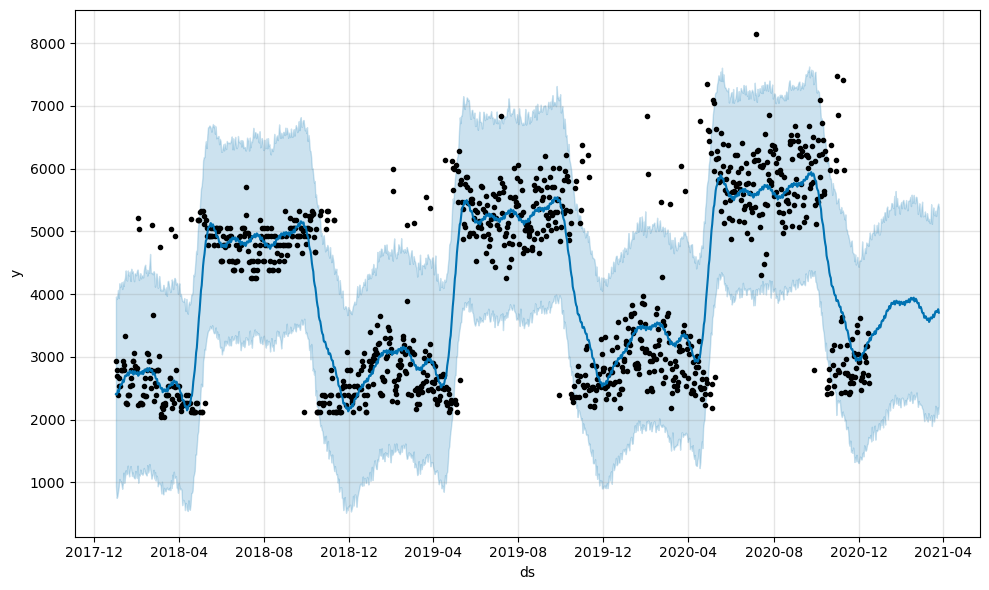

In [38]:
plot1 = m.plot(forecast)

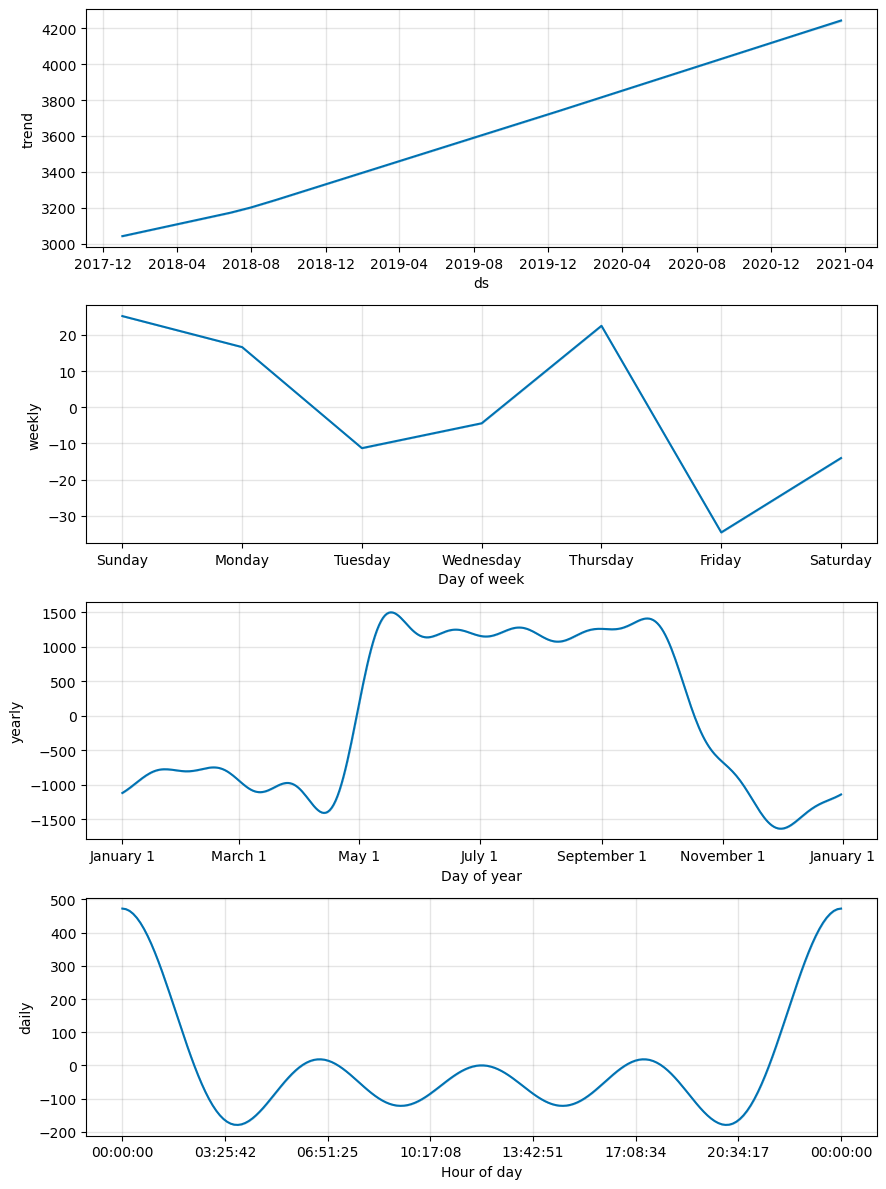

In [39]:
plt2 = m.plot_components(forecast)